## Name: Ilai Fallach, ID: 200924751
## Name: Orr Mandelbaum, ID: 200612190

# Question 1

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14 , 7)
import math
import scipy
from scipy import stats
from sklearn.metrics import mutual_info_score
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

a) Download the "Boston1.csv" database, and explore the data. Explanation about the dataset can be found here: http://www.clemson.edu/economics/faculty/wilson/R-tutorial/analyzing_data.html

Find the columns with missing values and filter them out of the data.

In [2]:
df = pd.read_csv("./Boston1.csv")

In [3]:
df = df.dropna(axis=1)

b) Divide the filtered data randomly into a train set (70% of the data) and test set (30% of the data).

In [4]:
train, test = train_test_split(df, test_size=0.3)

# Question 2

If you haven't done this previously, install the scikit-learn package for python.

a) On the train set, run a linear regression model as follows:
Divide the training set into explanatory variables (the X matrix with which we'll try to make a prediction) and a target variable (y, the value which we'll try to predict). Use the 'medv' attribute as the target variable y and the rest of the features as the X matrix. Run a linear regression model on those sets, and print the regression coefficients. 

In [5]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv', 'randCol'],
      dtype='object')

In [6]:
y_col = 'medv'
train_x = train.drop([y_col], axis=1)
train_y = train[y_col]
test_x = test.drop([y_col], axis=1)
test_y = test[y_col]
mdl = LinearRegression()
mdl.fit(train_x, train_y)
m = mdl.coef_
print(m)

[ -1.22852422e-01   4.10405086e-02   2.17435549e-02   2.97175497e+00
  -1.79763765e+01   3.63648357e+00  -3.53638315e-03  -1.48614197e+00
   3.02536439e-01  -1.07074192e-02  -1.01563822e+00   7.74149489e-03
  -5.52769187e-01  -1.98364801e-01]


/Users/ilaif/.virtualenvs/intro_ds/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


b) Use the linear regression model to predict the values of the test set's 'medv' column, based on the test set's other attributes. Print the Mean Squared Error of the model on the train set and on the test set.
Usually, the MSE on the train set would be lower than the MSE on the test set, since the model parameters are optimized with respect to the train set. Must this always be the case? Can you think of a few examples for when this might not be the case?

In [7]:
print(mse(mdl.predict(train_x), train_y))
print(mse(mdl.predict(test_x), test_y))

21.6636445547
22.7649791071


This is not always the case. Example for a case (Red points for train, green points for test):

In [8]:
e_train_y = np.array([3, 0, 5, 2, 7, 4, 9])
e_train_x = np.array(range(1, 7 + 1)).reshape(-1, 1)
e_test_y = np.array([8, 9, 10])
e_test_x = np.array(range(8, 10 + 1)).reshape(-1, 1)

In [9]:
mdl = LinearRegression()
mdl.fit(e_train_x, e_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

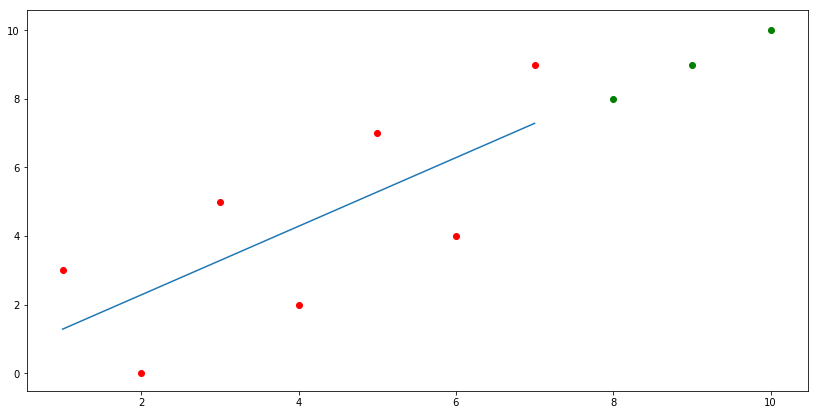

In [10]:
plt.scatter(e_train_x, e_train_y, c='r')
plt.scatter(e_test_x, e_test_y, c='g')
plt.plot(e_train_x, mdl.predict(e_train_x), '-')

In [11]:
print(mse(mdl.predict(e_train_x), e_train_y))
print(mse(mdl.predict(e_test_x), e_test_y))

3.91836734694
0.0816326530612


As we can see, the MSE of the test set is considerably lower than the train set's MSE. This is because the the test set "happened" to be very close to the linear model predicted by the regression.

c) Add some noise (with mean=0, std=1) to the test set's y, and predict it again. What happened to the MSE? Why?

In [12]:
noise = np.random.normal(loc=0.0, scale=1.0, size=len(test))
mdl.fit(train_x, train_y)
print(mse(mdl.predict(test_x), test_y))
test_noise_y = test_y + noise
print(mse(mdl.predict(test_x), test_noise_y))

22.7649791071
23.1472170023


The MSE had changed since we added a noise with mean = 0 and std = 1 so the addition to the y values can get us closer to the regression line or further from it.

# Question 3

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

a) Create a Recursive feature elimination model, with a linear regression estimator, that selects half of the original number of features. Hint: Check the feature_selection module in scikit-learn.

In [14]:
rfe = RFE(mdl)

b) Use the feature elimination model on the full database (after filtering columns with missing values, before partitioning into train/test). Print the features that were selected. Remember that we separate the 'medv' attribute to be our y, while the rest of the attributes in the dataset serve as features to learn from.

In [15]:
medv = df[y_col]
others = df.drop(['medv'], axis=1)

In [16]:
r = rfe.fit(others, medv)

In [17]:
print(others.columns[r.support_])

Index(['chas', 'nox', 'rm', 'dis', 'ptratio', 'lstat', 'randCol'], dtype='object')


c) We'd like to find out the optimal number of features. Create feature elimination models (with linear regression estimators) for every number of features between 1 and n (where n = all the original features, 'medv' excluded). For each number of features, run a linear regression as in Question 2, only on the selected features, in order to predict 'medv'. Print the Mean Sqaured Error for each number of features.

In [18]:
mses = []
for i in range(1, len(others.columns) + 1):
    rfe = RFE(mdl, n_features_to_select=i)
    r = rfe.fit(others, medv)
    features = others.columns[r.support_]
    x = others[features]
    y = medv
    mdl.fit(x, y)
    mse_x = mse(mdl.predict(x) ,y)
    mses.append(mse_x)
    print("# features: %s, MSE: %s" % (i, mse_x))

# features: 1, MSE: 69.0042883554
# features: 2, MSE: 39.2181167428
# features: 3, MSE: 37.5182698877
# features: 4, MSE: 32.4469471815
# features: 5, MSE: 30.9295460795
# features: 6, MSE: 23.9942148931
# features: 7, MSE: 23.988679676
# features: 8, MSE: 23.8731401756
# features: 9, MSE: 23.3449296742
# features: 10, MSE: 23.2555604454
# features: 11, MSE: 22.9303616104
# features: 12, MSE: 22.4250286244
# features: 13, MSE: 21.8808608279
# features: 14, MSE: 21.8807216167


d) Conclude the optimal number of features for this task. Think about the cost of adding for data vs the benefit of a more accurate prediction. Explain your answer.

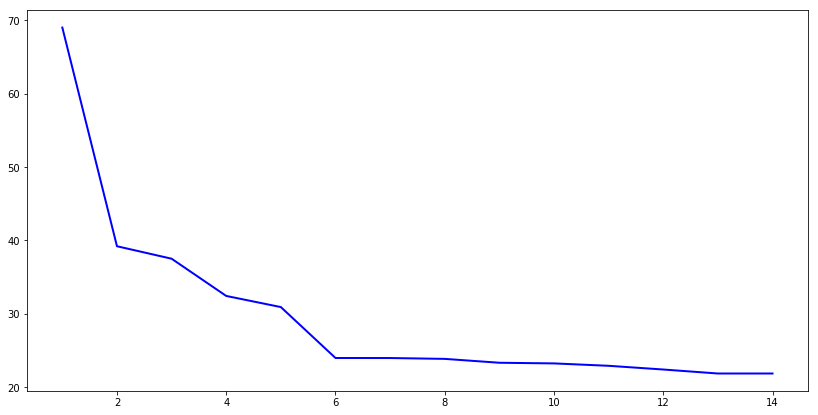

In [19]:
plt.plot(range(1, len(mses) + 1), mses, color='blue', linestyle='-', linewidth=2)

In [20]:
print("Optimal number of features: 6")

Optimal number of features: 6


We'll use the elbow method, we can see that there's a drop of the variance between feature 5 and 6 and after that the variance doesn't vary a lot, this tells us that the rest of the features are not telling us a lot of information after the 6th feature.

# Question 4

Perform a cross-validation of the linear regression on the train set with K=5. Print the CV scores for each repeat.

In [21]:
print(cross_val_score(mdl, train_x, train_y, cv=5))

[ 0.54788605  0.66887091  0.76500599  0.7288213   0.72027261]
